# Učinkovitost oklapanja

Učinkovitost oklapanja za pravokutni otvor, odnosno za slot antenu, ovisi o frekvenciji i duljini otvora. Maksimalna učinkovitost antene (najlošije oklapanje) ostvaruje se kada je $l=~\lambda/2$. Ukoliko se na toj frekvenciji definira učinkovitost oklapanja $S=0~\mathrm{dB}$, tada za linearnu dimenziju otvora $l \leq \lambda/2$ može se pisati

$S=20\log(\frac{\lambda}{2l})~\mathrm{[dB]}$.

Ukoliko postoji više otvora jednakih dimenzija linearno raspoređenih na površini manjoj od $\lambda/2$ tada se učinkovitost oklapanja smanjuje u ovisnosti o njihovom broju $n$,

$S=20\log(\frac{\lambda}{2l})-20\log(\sqrt n)~\mathrm{[dB]}$.






In [8]:
def SE(l,f,n):        
    l = l/1000
    lmbda = 3e8/f
    S = 20*np.log10(lmbda/(2*l))-20*np.log10(np.sqrt(n))    
    return S

<IPython.core.display.Javascript object>


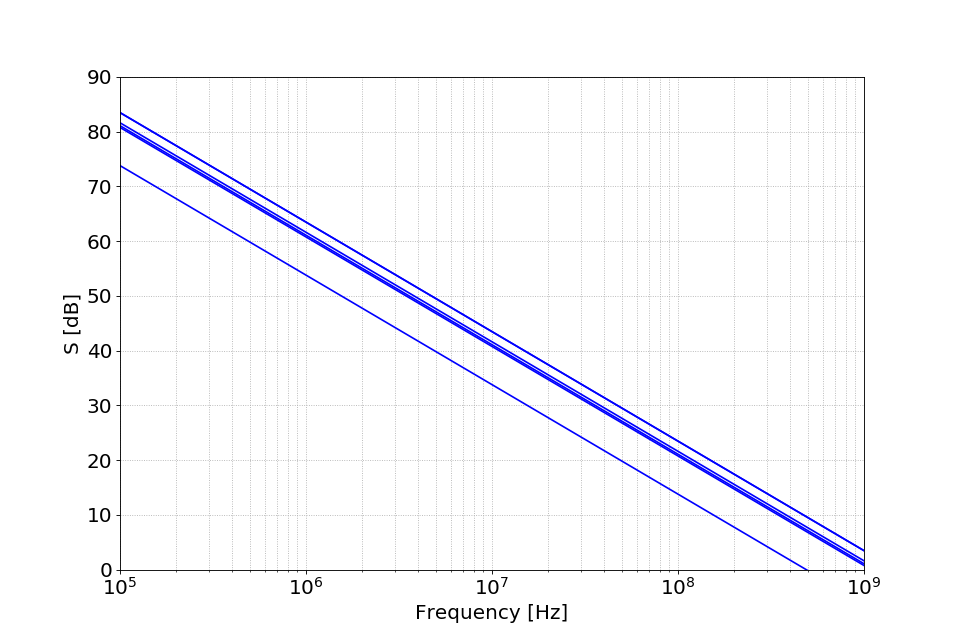

In [10]:
%matplotlib notebook
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual, FloatLogSlider, FloatSlider, Layout, Dropdown
import matplotlib.pyplot as plt
import numpy as np

output = widgets.Output()

style = {'description_width': '150px'}
fmin = FloatLogSlider(min=3, max=5, step=1, value=1e5,description='$f_{min}$ [Hz]:',style=style,layout=Layout(width='75%'), continuous_update=False)
fmax = FloatLogSlider(min=6, max=9, step=1, value=1e9,description='$f_{max}$ [Hz]:',style=style,layout=Layout(width='75%'), continuous_update=False)
l = FloatSlider(value=20,min=10,max=100,step=2,description='length [mm]:',readout_format='.1f',style=style,layout=Layout(width='75%'), continuous_update=False)
n = FloatSlider(value=5,min=1,max=30.0,step=1,description='apertures no.:',readout_format='.1f',style=style,layout=Layout(width='75%'), continuous_update=False)
hst = widgets.ToggleButtons(options=['OFF', 'ON'], description='History:',disabled=False,button_style='',style=style,layout=Layout(width='75%'), continuous_update=False)

fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')     
plt.rcParams.update({'font.size': 18})  
axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("linear")

plt.grid(True,which="both",ls=":")
plt.xlabel('Frequency [Hz]')
plt.ylabel('S [dB]')
plt.ylim(bottom = 0, top = 90)  

line_list = []
def f1(fmin, fmax, l, n, hst):
    
    f = np.logspace(np.log10(fmin), np.log10(fmax), num=100)        
    S = SE(l,f,n)        
    if (hst == 'OFF'):
        if line_list:
            for i, a in enumerate(line_list):
                line = a.pop(0)
                line.remove()    
            line_list[:] = []         
        [l.remove() for l in axes.lines] 
        line = axes.plot(f, S, linestyle='-', color='b')
        line_list.append(line)        
    else:
        line = axes.plot(f, S, linestyle='-', color='b')
        line_list.append(line) 
 
    plt.xlim(left = fmin, right = fmax)
        
        
out = widgets.interactive_output(f1, 
                                 {'fmin': fmin, 'fmax': fmax, 'l': l, 'n': n, 'hst': hst})        

tab = widgets.VBox(children=[fmin, fmax, l, n, hst])
widgets.VBox([tab, output])